In [1]:
import torch
from torch import nn
from d2l import torch as d2l

生成数据集

In [2]:
n_train =50 #训练样本数
# 排序后的训练样本
x_train, _ = torch.sort(
    torch.rand(
        n_train
    ) * 5
)
x_train

tensor([0.0668, 0.1084, 0.1398, 0.3475, 0.5365, 0.6403, 0.6461, 0.7153, 0.8467,
        0.9444, 0.9903, 0.9920, 1.1084, 1.3157, 1.3555, 1.3606, 1.6340, 1.6635,
        1.6656, 1.8673, 2.1328, 2.2516, 2.3154, 2.3955, 2.3997, 2.4852, 2.5894,
        2.6371, 2.9135, 3.2634, 3.2673, 3.3247, 3.3265, 3.4352, 3.5311, 3.6203,
        3.8197, 3.9116, 4.0401, 4.3430, 4.3515, 4.3544, 4.4470, 4.5173, 4.5964,
        4.6047, 4.6385, 4.6897, 4.7182, 4.7495])

In [3]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

In [4]:
# 训练样本
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))
# 测试样本
x_test = torch.arange(0, 5, 0.1)
# 测试样本的真实输出
y_truth = f(x_test)
# 测试样本数
n_test = len(x_test)
n_test

50

In [5]:
torch.normal(0.0, 0.5, (n_train,))

tensor([-0.1322, -0.1835,  0.5443,  0.2042,  0.4794, -0.2837, -0.0204, -0.2287,
        -0.0935, -0.5595,  0.1426, -0.2693,  0.4900, -0.1307, -1.1711,  0.4024,
        -0.0141,  0.9486, -0.0180,  0.0278, -0.2920,  0.6591,  0.2663, -0.5678,
        -0.2828,  0.0469, -0.0161,  0.2574,  0.3611,  0.2090,  0.5094, -0.5774,
        -0.5622, -1.2337, -0.2369, -0.9280, -0.3024, -0.7728, -0.4618, -0.0245,
         0.8172, -0.9734, -0.6838, -0.0816,  0.4016, -0.5037,  0.1760,  1.2313,
         0.3857, -0.6396])

In [6]:
def plot_kernel_reg(y_hat):
    d2l.plot(
        x_test, 
        [y_truth, y_hat], 
        'x', 
        'y', 
        legend=['Truth', 'pred'],
        xlim=[0, 5],
        ylim=[-1, 5]
    )
    d2l.plt.plot(x_train, y_train, '*', alpha=0.5);

平均汇聚

In [7]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
print("y_hat:",y_hat)
print("y_train.mean():",y_train.mean())
print("n_test:",n_test)
print('---------')
print('y_truth:',y_truth)
print('---------')
print('x_train:',x_train)
print('y_train:',y_train)

y_hat: tensor([2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068,
        2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068,
        2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068,
        2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068,
        2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068, 2.2068,
        2.2068, 2.2068, 2.2068, 2.2068, 2.2068])
y_train.mean(): tensor(2.2068)
n_test: 50
---------
y_truth: tensor([0.0000, 0.3582, 0.6733, 0.9727, 1.2593, 1.5332, 1.7938, 2.0402, 2.2712,
        2.4858, 2.6829, 2.8616, 3.0211, 3.1607, 3.2798, 3.3782, 3.4556, 3.5122,
        3.5481, 3.5637, 3.5597, 3.5368, 3.4960, 3.4385, 3.3654, 3.2783, 3.1787,
        3.0683, 2.9489, 2.8223, 2.6905, 2.5554, 2.4191, 2.2835, 2.1508, 2.0227,
        1.9013, 1.7885, 1.6858, 1.5951, 1.5178, 1.4554, 1.4089, 1.3797, 1.3684,
        1.3759, 1.4027, 1.4490, 1.5151, 1.6009])
---------
x_train: tensor([0.0668,

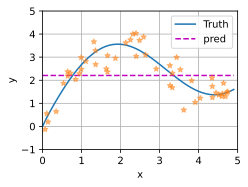

In [8]:
plot_kernel_reg(y_hat)

非参数注意力汇聚

x_test: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000])
x_test.shape: torch.Size([50])
X_repeat: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
        ...,
        [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
        [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
        [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]])
--------------
attention_weights.shape: torch.Size([50, 50])
attention_weights: tensor([[7.6967e-02, 7.6

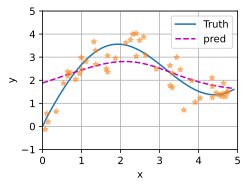

In [9]:
# x_repeat的形状：(n_test, n_train)
# 每一行都包含着相同的测设输入
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
print("x_test:",x_test)
print("x_test.shape:",x_test.shape)
print("X_repeat:",X_repeat)
# x_train包含着 健，attention_weights的形状：(n_test, n_train)
# 每行都包含这要给定的每个查询的之 值 (y_train) 之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
print("--------------")
print("attention_weights.shape:",attention_weights.shape)
print("attention_weights:",attention_weights)
y_hat = torch.matmul(attention_weights, y_train)
print("--------------")
print("y_hat.shape:",y_hat.shape)
print("y_hat:",y_hat)
plot_kernel_reg(y_hat)

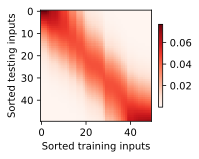

In [10]:
d2l.show_heatmaps(
    attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel="Sorted training inputs",
    ylabel="Sorted testing inputs"
)

带参数注意力汇聚

批量矩阵乘法

In [11]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
'''
计算两个tensor的矩阵乘法，
torch.bmm(a,b),tensor a 的size为(b,h,w),tensor b的size为(b,w,m)
也就是说两个tensor的第一维是相等的，
然后第一个数组的第三维和第二个数组的第二维度要求一样，
对于剩下的则不做要求，输出维度 （b,h,m）
'''
torch.bmm(X, Y).shape


torch.Size([2, 1, 6])

In [12]:
weights = torch.ones((2, 10)) * 0.1
print("weights:",weights)
values = torch.arange(20.0).reshape((2, 10))
print("values:",values)
print("----------------")
print("weights.unsqueeze(1):",weights.unsqueeze(1))
print("weights.unsqueeze(1).shape:",weights.unsqueeze(1).shape)
print("values.unsqueeze(1):",values.unsqueeze(1))
print("values.unsqueeze(-1).shape:",values.unsqueeze(-1).shape)

torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))
# torch.Size([2, 1, 1])

weights: tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]])
values: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]])
----------------
weights.unsqueeze(1): tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]])
weights.unsqueeze(1).shape: torch.Size([2, 1, 10])
values.unsqueeze(1): tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]],

        [[10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]]])
values.unsqueeze(-1).shape: torch.Size([2, 10, 1])


tensor([[[ 4.5000]],

        [[14.5000]]])

定义模型

In [19]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(
            torch.rand(
                (1,),
                requires_grad=True
            )
        )
        
    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为（查询个数，“健-值”对个数）
        queries = queries.repeat_interleave(
            keys.shape[1]
        ).reshape((-1, keys.shape[1]))
        
        self.attention_weights = nn.functional.softmax(
            -(
                (queries - keys) * self.w
            )**2 / 2,
            dim=1
        )
        # value的形状为（查询个数，“健-值”对个数）
        return torch.bmm(
            self.attention_weights.unsqueeze(1),
            values.unsqueeze(-1)
        ).reshape(-1)

训练

In [20]:
# X_title的形状：(n_train, n_train), 每一行都包含着相同的训练输入
X_title = x_train.repeat((n_train), 1)
'''
n_train: 50
x_train.shape: torch.Size([50])
X_title.shape: torch.Size([50, 50])
'''
# Y_title的形状：(n_train, n_train), 每一行都包含着相同的训练输出
Y_title = y_train.repeat((n_train), 1)

# keys的形状：('n_train', 'n_train'-1)
keys = X_title[
    (1 - torch.eye(n_train)).type(torch.bool)
].reshape((n_train, -1))
'''
torch.eye: 创建一个二维矩阵m × n，对角全为1，其它都为0，其实就是对角矩阵。

torch.eye(n_train): tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.eye(n_train).shape: torch.Size([50, 50])
1 - torch.eye(n_train): tensor([[0., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 1.],
        [1., 1., 1.,  ..., 1., 1., 0.]])
(1 - torch.eye(n_train)).type(torch.bool): tensor([[False,  True,  True,  ...,  True,  True,  True],
        [ True, False,  True,  ...,  True,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True,  True, False]])
(1 - torch.eye(n_train)).type(torch.bool).shape: torch.Size([50, 50])
 X_title[(1 - torch.eye(n_train)).type(torch.bool)]: tensor([0.0218, 0.0604, 0.2544,  ..., 4.6195, 4.8271, 4.9580])
 X_title[(1 - torch.eye(n_train)).type(torch.bool)].shape: torch.Size([2450])
keys.shape: torch.Size([50, 49])

'''
# values的形状：('n_train', 'n_train'-1)
values = Y_title[
    (1 - torch.eye(n_train)).type(torch.bool)
].reshape((n_train), -1)

In [26]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)

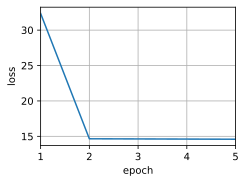

In [27]:

animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])
for epoch in range(5):
    trainer.zero_grad()
    l = loss(
        net(x_train, keys, values), y_train
    )
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(
        epoch + 1, float(l.sum())
    )

net(x_test, keys, values): tensor([0.0719, 0.2232, 0.2971, 0.6248, 0.7796, 1.8689, 2.1790, 2.2785, 2.1532,
        2.3475, 2.6249, 2.7787, 3.0926, 3.2843, 3.1128, 2.7915, 2.6173, 2.6654,
        2.8842, 2.9533, 3.2890, 3.6309, 3.7316, 3.8097, 3.6307, 3.6728, 3.5400,
        3.2946, 2.5950, 2.4917, 2.4916, 2.2698, 2.1772, 2.1121, 2.4380, 2.4785,
        1.3715, 1.0933, 1.8097, 1.3220, 1.1779, 1.2218, 1.6643, 1.7098, 1.6030,
        1.4190, 1.4710, 1.4800, 1.4712, 1.4895],
       grad_fn=<ReshapeAliasBackward0>)
net(x_test, keys, values).shape: torch.Size([50])
y_hat: tensor([[0.0719],
        [0.2232],
        [0.2971],
        [0.6248],
        [0.7796],
        [1.8689],
        [2.1790],
        [2.2785],
        [2.1532],
        [2.3475],
        [2.6249],
        [2.7787],
        [3.0926],
        [3.2843],
        [3.1128],
        [2.7915],
        [2.6173],
        [2.6654],
        [2.8842],
        [2.9533],
        [3.2890],
        [3.6309],
        [3.7316],
        [3.80

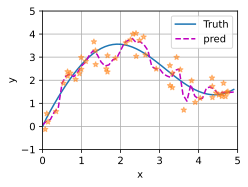

In [31]:
# keys的形状：(n_test, n_train)，每一行包含着相同的训练输入
keys = x_train.repeat((n_test, 1))
# value的形状：(n_test, n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(
    x_test, keys, values
).unsqueeze(1).detach()
print("net(x_test, keys, values):",net(x_test, keys, values))
print("net(x_test, keys, values).shape:",net(x_test, keys, values).shape)
print("y_hat:",y_hat)
print("y_hat.shape:",y_hat.shape)
plot_kernel_reg(y_hat)

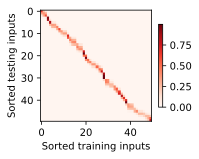

In [34]:
d2l.show_heatmaps(
    net.attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs',
    ylabel='Sorted testing inputs'
)

In [39]:
print("net.attention_weights:",net.attention_weights)
print("net.attention_weights.shape:",net.attention_weights.shape)
print("net.attention_weights.unsqueeze(0).shape:",net.attention_weights.unsqueeze(0).shape)
print("net.attention_weights.unsqueeze(0).unsqueeze(0).shape:",net.attention_weights.unsqueeze(0).unsqueeze(0).shape)

net.attention_weights: tensor([[0.6590, 0.2512, 0.0898,  ..., 0.0000, 0.0000, 0.0000],
        [0.3241, 0.3715, 0.3042,  ..., 0.0000, 0.0000, 0.0000],
        [0.0869, 0.2996, 0.5623,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.2576, 0.2501, 0.1889],
        [0.0000, 0.0000, 0.0000,  ..., 0.1460, 0.3014, 0.5216],
        [0.0000, 0.0000, 0.0000,  ..., 0.0438, 0.1922, 0.7620]],
       grad_fn=<SoftmaxBackward0>)
net.attention_weights.shape: torch.Size([50, 50])
net.attention_weights.unsqueeze(0).shape: torch.Size([1, 50, 50])
net.attention_weights.unsqueeze(0).unsqueeze(0).shape: torch.Size([1, 1, 50, 50])
